# Insurance Prediction & Analysis


Insurance Premium dataset

The columns are
1. age --> age of the person
2. sex --> sex of the person
3. bmi --> bmi of the person
4. Children --> how many children he have
5. smoker --> Is he a smoker or not
6. region --> which region are they from
7. charges --> what's the premium

 * Who will the audience be? <br>
     &nbsp; People who are gonna take a new insurance
 * What value will they derive from your story? <br>
      &nbsp; They can estimate the amount of premium they need to pay

## <u>Data cleaning</u>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree

In [2]:
df=pd.read_csv('myData/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1341.000000,1341.000000,1339.000000,1.339000e+03
mean,39.219985,30.727535,1.094100,8.794311e+04
std,14.041838,6.318726,1.205414,2.732476e+06
min,18.000000,15.960000,0.000000,1.121874e+03
25%,27.000000,26.315000,0.000000,4.742306e+03
50%,39.000000,30.400000,1.000000,9.386161e+03
75%,51.000000,34.770000,2.000000,1.671701e+04
max,64.000000,89.000000,5.000000,1.000000e+08


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 7 columns):
age         1341 non-null float64
sex         1341 non-null object
bmi         1341 non-null float64
children    1339 non-null float64
smoker      1343 non-null object
region      1342 non-null object
charges     1339 non-null float64
dtypes: float64(4), object(3)
memory usage: 73.8+ KB


(1347, 7)

In [5]:
df.isna().sum() 

age         6
sex         6
bmi         6
children    8
smoker      4
region      5
charges     8
dtype: int64

## <b>Dropping the na values</b>

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## <u>Data Exploration</u>

## <b> Let's see the distribution of age and bmi in dataset </b>

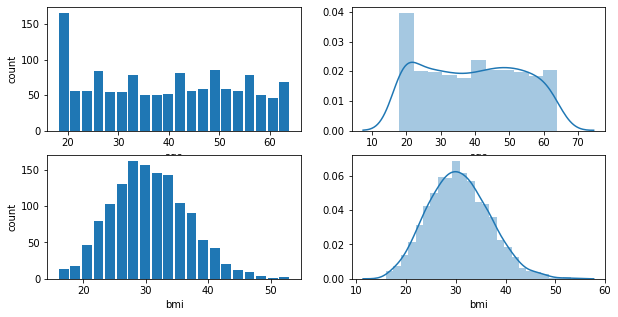

In [8]:
#age
plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
plt.hist(df['age'],bins=20,rwidth=0.85)
plt.ylabel('count')
plt.xlabel('age')

plt.subplot(2,2,2)
sns.distplot(df['age'])
#bmi
plt.subplot(2,2,3)
plt.hist(df['bmi'],bins=20,rwidth=0.85)
plt.ylabel('count')
plt.xlabel('bmi')

plt.subplot(2,2,4)
sns.distplot(df['bmi'])

from the above plots we can see that there are many people around the age 20
and for bmi the graph gradually increases till 30 and then gradually decreases

## <b> Let's see the distribution of sex and smokers in dataset </b>

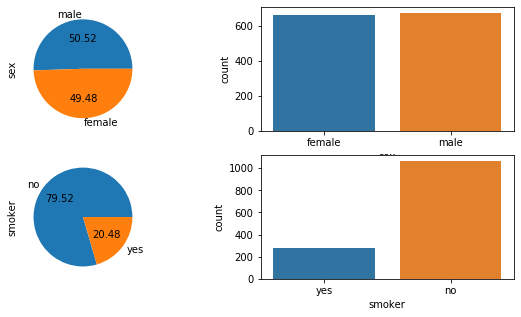

In [9]:
plt.figure(figsize =(10,5))

# SEX

plt.subplot(221)
df['sex'].value_counts().plot(kind ='pie',autopct ="%.2f")
plt.subplot(222)
sns.countplot(df['sex'])

# smoker
plt.subplot(223)
df['smoker'].value_counts().plot(kind = 'pie',autopct = '%.2f')
plt.subplot(224)
sns.countplot(df['smoker'])

In these plot we can see the the male and female population are almost equal 
but in smokers there are lot of people who doesn't smoke

## <b> Let's see the distribution of region in the dataset </b>

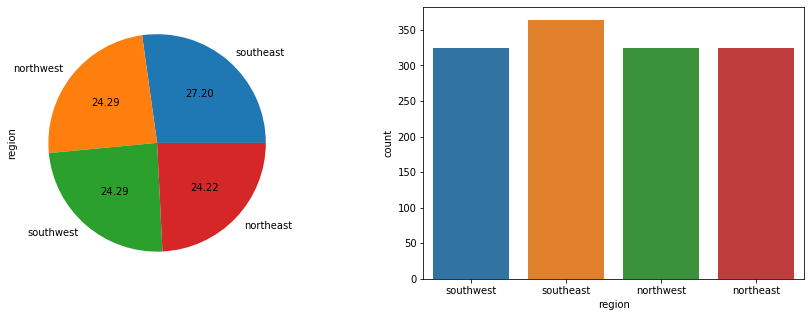

In [10]:
# region 

fig = plt.figure(figsize = (15,5))

plt.subplot(121)
df['region'].value_counts().plot(kind ='pie',autopct='%.2f')
plt.subplot(122)
sns.countplot(df['region'])

the region distribuition is almost equal only southeast has bit more values than others

In [11]:
# calculating the percentage of people from diff region 
df['region'].value_counts() / df.shape[0] * 100

southeast    27.204783
northwest    24.289985
southwest    24.289985
northeast    24.215247
Name: region, dtype: float64

## <b> Plotting age for charges above and below 20000 </b>

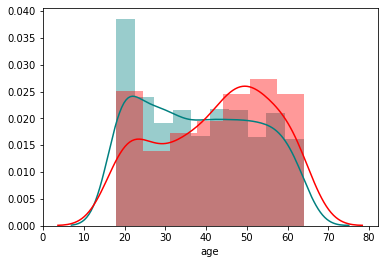

In [12]:
sns.distplot(df[df['charges'] < 20000]['age'],color = 'teal')
sns.distplot(df[df['charges'] > 20000]['age'],color ='red')

From this plot we can see that lot of people who pay less than young age and people who pay more are old age

## <b> plotting bmi for charges above and below 20000 </b>

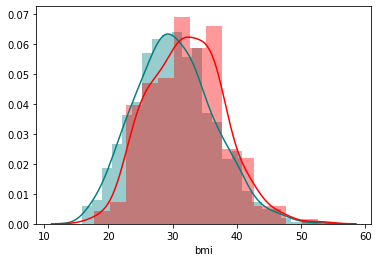

In [13]:
sns.distplot(df[df['charges'] < 20000]['bmi'],color = 'teal')
sns.distplot(df[df['charges'] > 20000]['bmi'],color ='red')

here we can see that people who have low bmi pays less and people who have high bmi pays more but this is not in all cases

## <b> plotting sex vs charges with respect to smoker </b>

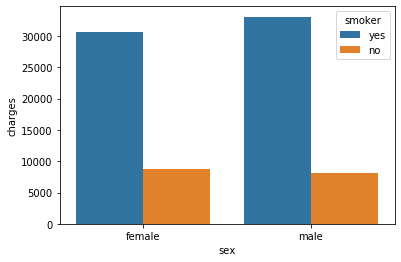

In [14]:
pl = sns.barplot(df['sex'], df['charges'], hue = df['smoker'],ci=0)

here we can see that the charges is more for the male smokers than female smokers.

## <b> plotting children vs charges with respect to smoker </b>

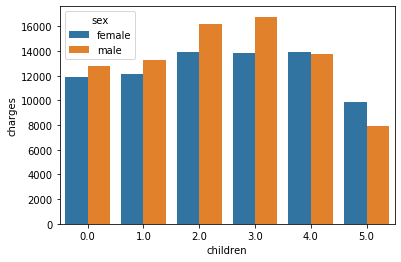

In [15]:
sns.barplot(df['children'], df['charges'],hue = df['sex'],ci=0)

here we can see that the people who have 2 or 3 children have more charges and we can also that the male have more charges in most cases.

## <b> plotting region vs charges </b>

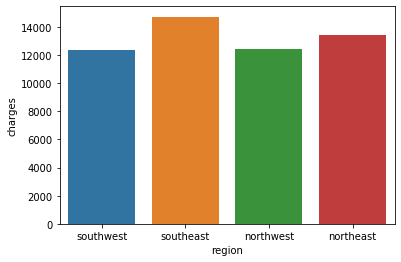

In [16]:
sns.barplot(df['region'],df['charges'],ci=0)

here we can see that the people in south east have more charges that rest of the crowd

## <b> Heat Map for the components in dataframe</b>

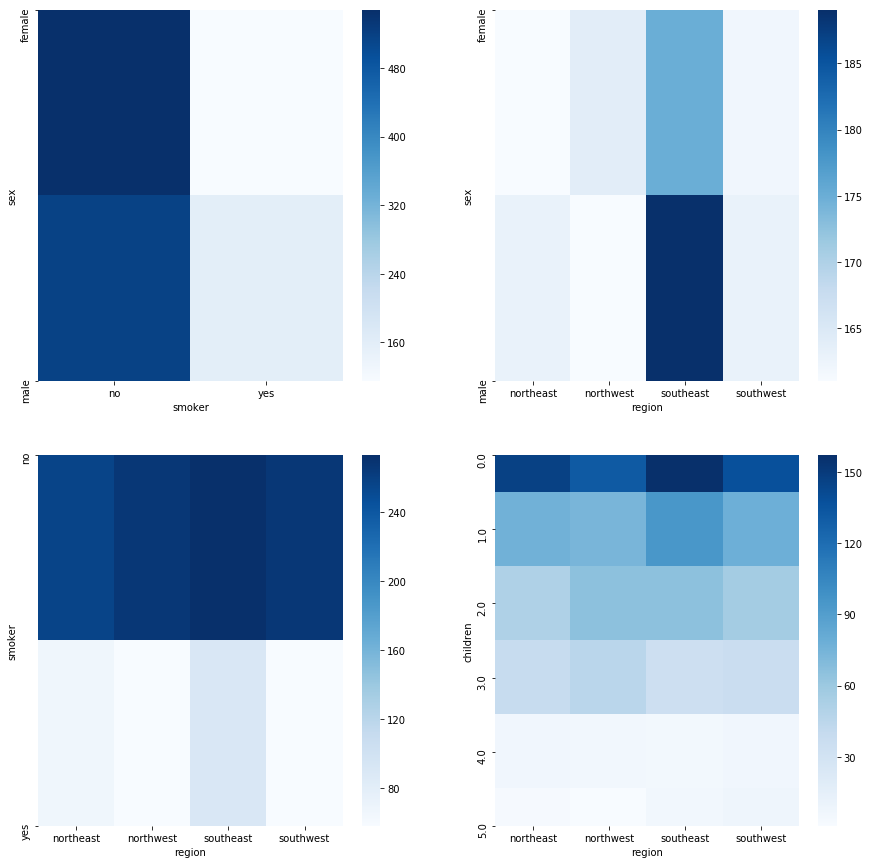

In [17]:
fig = plt.figure(figsize = (15,15))
plt.subplot(221)
map = pd.crosstab(df['sex'], df['smoker'])
sns.heatmap(map,cmap='Blues')
plt.subplot(222)
map1 = pd.crosstab(df['sex'], df['region'])
sns.heatmap(map1,cmap='Blues')
plt.subplot(223)
map2 = pd.crosstab(df['smoker'], df['region'])
sns.heatmap(map2,cmap='Blues')
plt.subplot(224)
map3 = pd.crosstab(df['children'], df['region'])
sns.heatmap(map3,cmap='Blues')

from the above heat map we observe that there is lot of female nonsmokers than male
and also most of the people have 0 childrens

## <b>checking for outliers</b>

       age     bmi  children      charges
0     19.0  27.900       0.0  16884.92400
1     18.0  33.770       1.0   1725.55230
2     28.0  33.000       3.0   4449.46200
3     33.0  22.705       0.0  21984.47061
4     32.0  28.880       0.0   3866.85520
...    ...     ...       ...          ...
1342  50.0  30.970       3.0  10600.54830
1343  18.0  31.920       0.0   2205.98080
1344  18.0  36.850       0.0   1629.83350
1345  21.0  25.800       0.0   2007.94500
1346  61.0  29.070       0.0  29141.36030

[1338 rows x 4 columns]


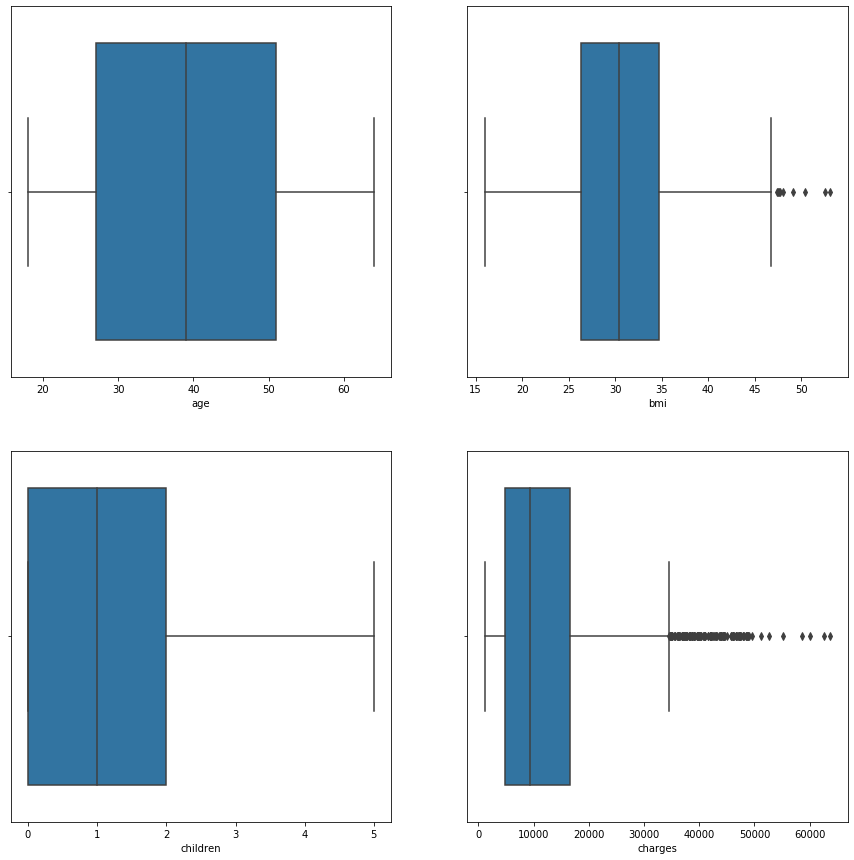

In [18]:
# boxplot
# selecting numerical fields 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
print(newdf)
j = 1
fig  = plt.figure(figsize= (15,15))
for i in newdf.columns:
 
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    j=j+1

here we can see that the bmi have lots of outliers which needs to be removed

In [19]:
df['bmi'].skew()

0.2840471105987448

## <b>Using IQR method to remove the outlier</b>

In [20]:
# Using IQR method to capp the outlier

q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)

iqr = q3 - q1 

mini = q1 - 1.5 *iqr 
maxi = q3 + 1.5 *iqr


df['bmi'] = np.where(
    df['bmi'] > maxi,
    maxi,
    np.where(
        df['bmi'] < mini,
        mini,
        df['bmi']
    )
)
print(mini)
print(maxi)

13.7
47.290000000000006


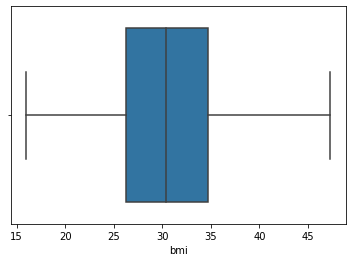

In [21]:
sns.boxplot(df['bmi'])

here we can see that the ouliers are removed

In [22]:
new_df = pd.get_dummies(df,columns = ['sex','smoker','region'],drop_first= True)

In [23]:
new_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,0,1,0,0,1
1,18.0,33.770,1.0,1725.55230,1,0,0,1,0
2,28.0,33.000,3.0,4449.46200,1,0,0,1,0
3,33.0,22.705,0.0,21984.47061,1,0,1,0,0
4,32.0,28.880,0.0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1342,50.0,30.970,3.0,10600.54830,1,0,1,0,0
1343,18.0,31.920,0.0,2205.98080,0,0,0,0,0
1344,18.0,36.850,0.0,1629.83350,0,0,0,1,0
1345,21.0,25.800,0.0,2007.94500,0,0,0,0,1


## <u>Data Modeling</u>

## Step 5: Using Linear Regression and Bayesian Ridge


In [24]:

X= new_df.drop(columns = ['charges'])
y = new_df['charges']

x_train,x_test,y_train,y_test =train_test_split(X,y ,test_size=0.2,random_state =12)

In [25]:

lr = LinearRegression()
br = BayesianRidge()

lr.fit(x_train,y_train)
br.fit(x_train,y_train)



BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [26]:
y_pred = lr.predict(x_test)
y_br_pred = br.predict(x_test)

In [27]:
r2_score(y_test,y_pred)

0.7103707081881969

In [28]:
lr.score(x_test,y_test)


0.7103707081881969

In [29]:
r2_score(y_test,y_br_pred)

0.7103624976385953

In [30]:
br.score(x_test,y_test)

0.7103624976385953

In [31]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8844869959339359


##  <u> Visualizing the Results </u>


Text(0.5, 1, 'Correlation Matrix')

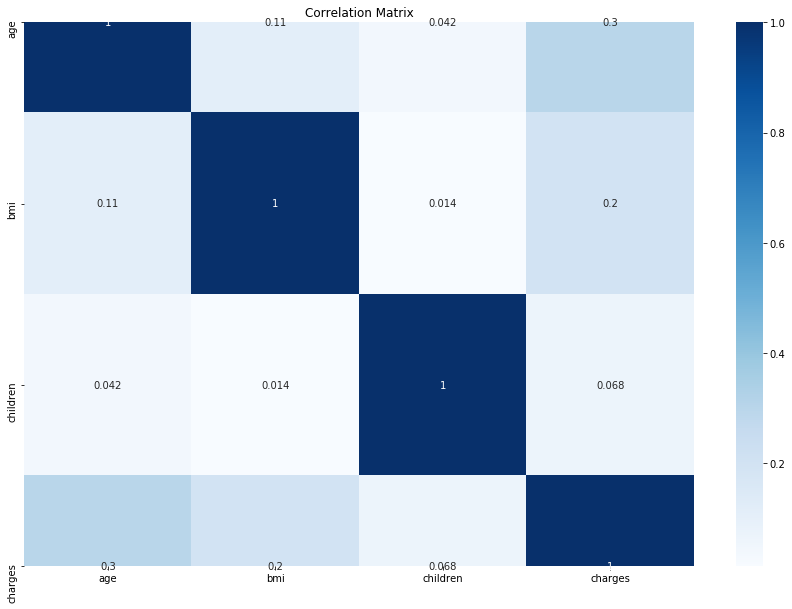

In [32]:

corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title("Correlation Matrix")


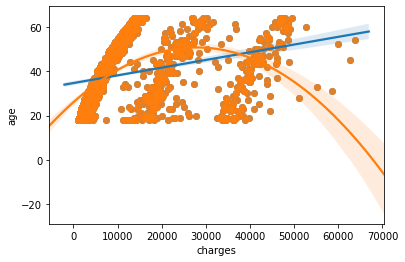

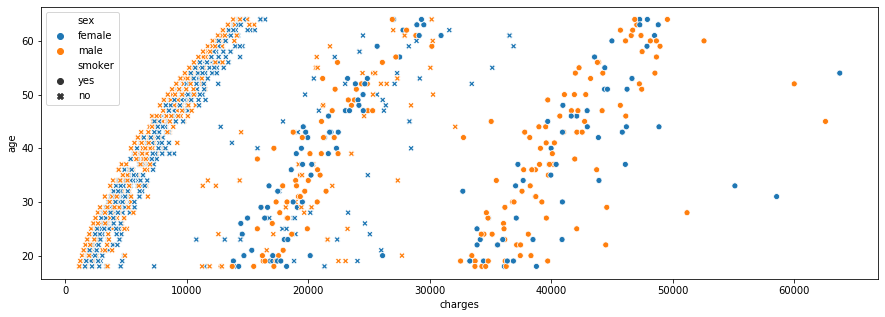

In [37]:
# age vs charges
sns.regplot(y=df['age'],x=df['charges'])
sns.regplot(y=df['age'],x=df['charges'], order=2)


fig =plt.figure(figsize = (15,5))
sns.scatterplot(df['charges'],df['age'], hue =df['sex'],style=df['smoker'])

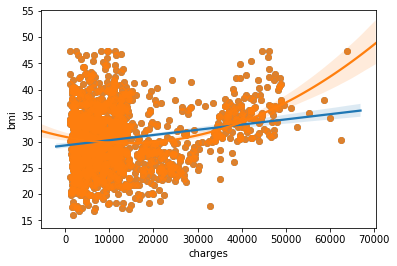

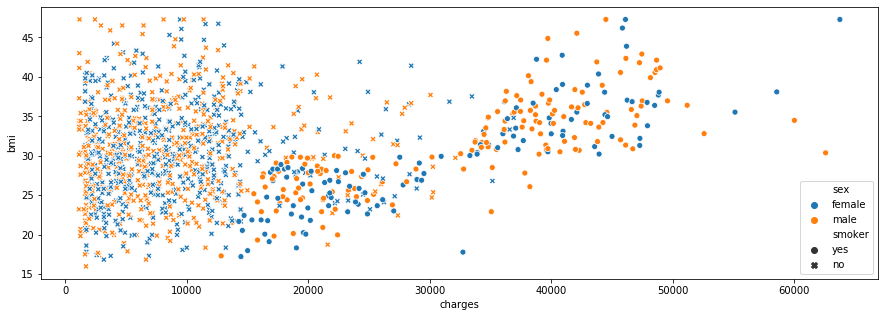

In [38]:
# bmi vs charges 
sns.regplot(y=df['bmi'],x=df['charges'])
sns.regplot(y=df['bmi'],x=df['charges'], order=2)

fig =plt.figure(figsize = (15,5))
sns.scatterplot(df['charges'],df['bmi'], hue =df['sex'],style=df['smoker'])

## <u>Communicating the Story </u>


From the above analysis we saw that the variation of charges with the interference of other variables in the correlation matrix. we also found a few things. People who smoke have a higher premium charged. Among nonsmokers, the male has the lowest premium. We can also see that, as age increases, the premium/charges also tend to increase. People with 2/3 children receive a higher premium than those with any other number of children. From the correlation plot, we can see that age and BMI are more correlated to the charges. This implies that charges/premiums are more affected by age and BMI than by other factors. 

so, from this analysis we can see which factors that affect the charges/premium of the insurance.



<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



I have did this Final project story telling step by step as the DSA project lifecycle explains which starts from Project Definition to ML model deployment 

1) At first to do project i have searched for some datasets in those i found insurance dataset so from that the purpose of analysing is to predict the charges/premium of the house based on age,bmi and several other factors which is the first stage in DSA project lifecycle which is 'Project Definition,Requirements and Expectations'.

2) Next 'Data acquisition,Governance,Curation and Source code management', Here I have acquired the data in form of csv file.

3) The next stage is 'Data shaping and carpentary' this is the most important step here i have checked the sum of na values in columns and removed those to clean the dataset.

4) And Next comes 'Exploratory data analysis and visualization' which is also a important stage in which i found that BMI column has many outliers and it will affect the training of model so i removed those columns and also I did some visualization to check the relation betweent the attributes.

5) Next stage is 'Machine Learning Model Planning Building testing' so in this stage we need to decide the model which is suitable for out data i choose Linear Regression and created Training and Testing datasets with 80% to training and 20% to testing.

6) After building next come validation like 'Machine learning Model Validation,Visualization and Interpretation' so in this stage i checked R square value to check weather the model is giving expected accuracy or not. This stage decides weather the model selected is appropriate or not.

7) And next the analysis is done and need to be presented to the audience who is intended of this analysis so for that we need some visualizations for better understanding to audience and so this stage is named 'Data Story Deployment Reporting'.

8) The last stage is 'Machine Learning model Deployment and Monitoring' since my project is a simple prediction project this stage doesn't come into picture that much but this is a important in real time projects where there will be real stakeholders who will be expecting the better performance of the model.





